In [1]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt # 그래프 출력
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns

# 경고 메시지 처리
import warnings

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

sns.set(style='darkgrid')

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

# 경고메시지 출력 생략
warnings.filterwarnings('ignore')

# 런타임을 다시 실행시켜야 한글폰트가 적용됩니다

NanumGothic Eco


In [2]:
import pandas as pd
df_incheon = pd.read_csv('/content/인천 파이널.csv')
df_incheon.drop('Unnamed: 0', axis = 1, inplace = True)
df_incheon

,지역구,인구수,반려동물 등록 수,반려동물 조사연도,가중치,2022 반려동물 등록 수,구별 반려동물 등록비율
0,중구,152265,17498,2022,1.000,17498,0.114918
1,동구,58809,36164,2022,1.000,36164,0.614940
2,미추홀구,406723,3977,2021,1.098,4366,0.010735
3,연수구,385955,23320,2022,1.000,23320,0.060422
4,남동구,506911,38063,2022,1.000,38063,0.075088
5,부평구,489137,23118,2021,1.098,25383,0.051893
6,계양구,289520,22292,2022,1.000,22292,0.076996
7,서구,585036,6587,2022,1.000,6587,0.011259


In [3]:
df_incheon['지역구'][2] = '남구'
df_incheon

,지역구,인구수,반려동물 등록 수,반려동물 조사연도,가중치,2022 반려동물 등록 수,구별 반려동물 등록비율
0,중구,152265,17498,2022,1.000,17498,0.114918
1,동구,58809,36164,2022,1.000,36164,0.614940
2,남구,406723,3977,2021,1.098,4366,0.010735
3,연수구,385955,23320,2022,1.000,23320,0.060422
4,남동구,506911,38063,2022,1.000,38063,0.075088
5,부평구,489137,23118,2021,1.098,25383,0.051893
6,계양구,289520,22292,2022,1.000,22292,0.076996
7,서구,585036,6587,2022,1.000,6587,0.011259


In [4]:
# 폴리움 설치
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# 폴리움 실행
import folium

In [7]:
import requests
import json

# 행정구역 json파일
geo_path = '/content/IncheonBound.geojson'
Incheon_si = json.load(open(geo_path, encoding = 'utf-8'))

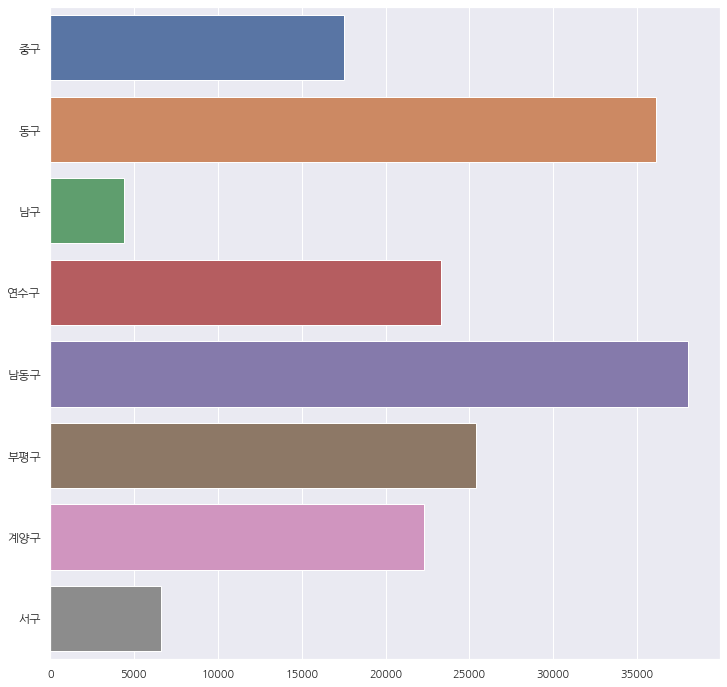

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 12))
sns.barplot(x = df_incheon['2022 반려동물 등록 수'], y = df_incheon['지역구'])
plt.yticks(fontsize=12)
# plt.title('인천시 반려동물 등록 수')
plt.xlabel("")
plt.ylabel("")
plt.show()

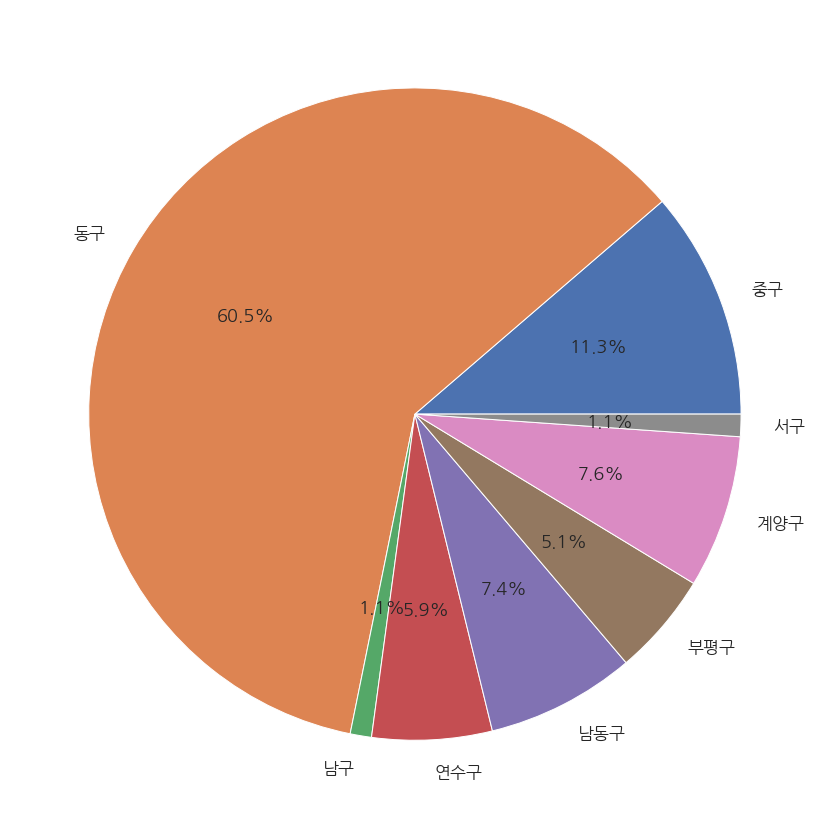

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15, 15))
plt.rc('font', size=18)
plt.rc('xtick', labelsize=17)
colors = sns.color_palette('pastel')
plt.pie(df_incheon['구별 반려동물 등록비율'], labels = df_incheon['지역구'], autopct='%.1f%%')
# plt.title('인천 구별 인구대비 반려동물 등록 비율')
plt.show()

In [ ]:
geo_gu_list = [a['properties']['name'] for a in Incheon_si['features']]
sorted(geo_gu_list), len(geo_gu_list)

(['계양구', '남구', '남동구', '동구', '부평구', '서구', '연수구', '중구'], 8)

In [ ]:
incheon_group_data = df_incheon.groupby('지역구', as_index = False)[['구별 반려동물 등록비율']].sum()
list(incheon_group_data['지역구']), len(list(incheon_group_data['지역구']))

(['계양구', '남구', '남동구', '동구', '부평구', '서구', '연수구', '중구'], 8)

In [ ]:
incheon_map = folium.Map(
    location=[37.53, 126.74],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    Incheon_si,
    name='지역구'
).add_to(incheon_map)

incheon_map.choropleth(geo_data=Incheon_si,
             data= incheon_group_data,
             columns = incheon_group_data.columns,
             fill_color='PuRd',
             fill_opacity=0.5,
             line_opacity=1,
             key_on = 'properties.name',
             legend_name="구별 인구대비 반려동물 등록 비율"
            )
incheon_map.save('incheon_map2.html')
incheon_map